In [1]:
import pandas as pd
from pandas import DataFrame, Series
#false positive warnings all the time:
pd.options.mode.chained_assignment = None

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import statistics

import os.path

In [2]:
#http://matplotlib.org/1.4.0/users/customizing.html

plt.style.use('ggplot')

mpl.rcParams['font.size'] = 18

### LINES
mpl.rcParams['lines.linewidth'] = '2.0'        # line width in points
mpl.rcParams['lines.marker']    = 'None'
mpl.rcParams['lines.markersize']=  '6'          # markersize, in points

###LEGEND
mpl.rcParams['legend.fontsize']='medium'

### GRIDS
mpl.rcParams['grid.color']='black'     # grid color
mpl.rcParams['grid.linestyle'] =':'    # dotted
mpl.rcParams['grid.linewidth']='0.5'   # in points
mpl.rcParams['grid.alpha']='1.0'       # transparency, between 0.0 and 1.0

### TICKS
mpl.rcParams['xtick.labelsize']="small"  # fontsize of the tick labels
mpl.rcParams['xtick.direction']="out"      # direction: in, out, or inout
mpl.rcParams['ytick.labelsize']="small"   # fontsize of the tick labels
mpl.rcParams['ytick.direction']="out"      # direction: in, out, or inout

### AXES
mpl.rcParams['axes.linewidth']  =  '1.0'    # edge linewidth
mpl.rcParams['axes.grid']       =  'True'   # display grid or not
mpl.rcParams['axes.titlesize']  =  'large'  # fontsize of the axes title
mpl.rcParams['axes.labelsize']  = 'large'  # fontsize of the x any y labels
mpl.rcParams['axes.facecolor']= 'white'     # axes background color

mpl.rcParams['figure.facecolor']= '1.0'     # figure facecolor; 0.75 is scalar gray

In [3]:
def generateSimulationID(tup):
    identifier = tup[0] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + tup[3] \
            + "_" + tup[4] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra


simulation_map = {
    "Watdiv10M": "W10", "Watdiv100M": "W100", "Watdiv1000M": "W1000", "Ontoforce": "Ont"
}

def generateSimulationIDCompact(tup, pref_length=3):
    #pref_length = 3
    identifier = tup[0][:pref_length] \
            + "_N" + str(tup[1]) \
            + "_" + str(tup[2]) \
            + "_" + simulation_map[tup[3]] \
            + "_" + str(tup[4])[:pref_length] \
    
    extra = ""
    if len(tup[5]) !=0:
        extra = "_" + str(tup[5])
    
    return identifier+extra


In [4]:
def generateFilenameQueryEventsCorrect(bmtuple):
    fname = './csv_correct/' +  bmtuple[0] + "_N" + str(bmtuple[1]) + "_" + str(bmtuple[2]) + "_" + bmtuple[3] + "_" + bmtuple[4]
    if len(str(bmtuple[5])) != 0:
        fname = fname + "_" + str(bmtuple[5])
    return fname + "_queryevents_correct.csv"


def generate_sorted_events_filename(tup):
    return 'query_events_sorted/'+generateSimulationID(tup)+"_events_sorted.csv"

# Runtime single threaded vs multi-threaded 

* Try to eliminate **caching effects** by taking the slowest query in the stress tests!

In [5]:
tup = ('Virtuoso', 1, 64,'Watdiv1000M', 'Optimized', '')
df = pd.read_csv(generate_sorted_events_filename(tup), sep='\t', index_col=0)
df.head(n=10)

,sim_id,query_name,thread_id,thread_type,order_id,number_of_results,runtime,flag,correct,cumul_time,overall_order_id,cumul_results
0,Vir_N1_64_W1000_Opt,S5/S5_split14.sparql,1,warmup,1,0,0.873330,SUCCESS,CORRECT,0.873330,0,0
1,Vir_N1_64_W1000_Opt,L1/L1_split17.sparql,1,warmup,2,0,1.318553,SUCCESS,CORRECT,2.191883,1,0
2,Vir_N1_64_W1000_Opt,S1/S1_split12.sparql,1,warmup,3,9,5.462552,SUCCESS,CORRECT,7.654435,2,9
3,Vir_N1_64_W1000_Opt,S6/S6_split17.sparql,1,warmup,4,1567,4.722458,SUCCESS,CORRECT,12.376893,3,1576
4,Vir_N1_64_W1000_Opt,F1/F1_split2.sparql,1,warmup,5,251,0.662693,SUCCESS,CORRECT,13.039586,4,1827
5,Vir_N1_64_W1000_Opt,F5/F5_split10.sparql,1,warmup,6,43,0.544959,SUCCESS,CORRECT,13.584546,5,1870
6,Vir_N1_64_W1000_Opt,S3/S3_split14.sparql,1,warmup,7,0,0.161130,SUCCESS,CORRECT,13.745676,6,1870
7,Vir_N1_64_W1000_Opt,S3/S3_split6.sparql,1,warmup,8,0,0.056398,SUCCESS,CORRECT,13.802074,7,1870
8,Vir_N1_64_W1000_Opt,F5/F5_split6.sparql,1,warmup,9,32,0.023044,SUCCESS,CORRECT,13.825117,8,1902
9,Vir_N1_64_W1000_Opt,F1/F1_split0.sparql,1,warmup,10,251,0.081548,SUCCESS,CORRECT,13.906666,9,2153


In [6]:
test_pivot = pd.pivot_table(df, values='runtime', index='query_name', columns='thread_type', aggfunc='max')

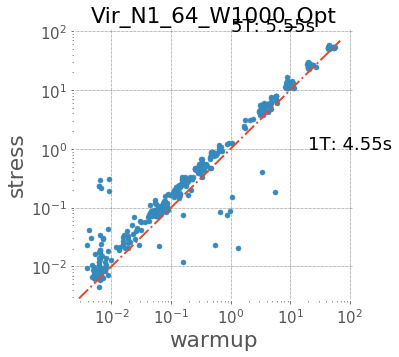

In [7]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
test_pivot.plot(kind='scatter', x='warmup', y='stress', ax=ax, loglog=True, s=25)
plt.plot(np.arange(0,70),np.arange(0,70), linestyle='-.')
plt.title(generateSimulationIDCompact(tup))
ax.text(20,1,'1T: 4.55s')
ax.text(1,100,'5T: 5.55s')

In [8]:
means = test_pivot.mean()
slower_stress = (means['stress'] / means['warmup'] -1) *100
print('Percentage extra runtime during stress test: ' + str(slower_stress))

Percentage extra runtime during stress test: 20.5700029715


In [9]:
test_pivot['extra_runtime'] = test_pivot['stress'] / test_pivot['warmup']  

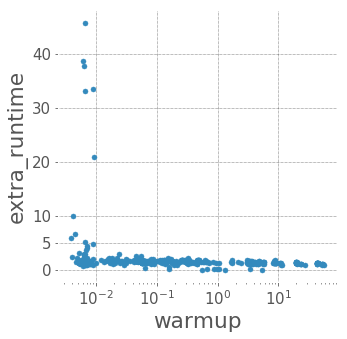

In [10]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
test_pivot.plot(kind='scatter', x='warmup', y='extra_runtime', ax=ax, s=25, logx=True)
ax.set_yticks([0,5,10,20,30,40])

In [11]:
tuple_list = [ \
                ('Blazegraph', 1, 64,'Watdiv1000M', 'Optimized', ''), \
                ('ES', 1, 64,'Watdiv1000M', 'Default', '')          , \
                ('GraphDB', 1, 64,'Watdiv1000M', 'Optimized', '')   , \
                ('Virtuoso', 1, 64,'Watdiv1000M', 'Optimized', '')  , \
                ('Fuseki', 1, 64,'Watdiv100M', 'Default', ''), \
                ('LDF', 1, 64,'Watdiv100M', 'Default', ''), \
                #('FluidOps', 3, 64,'Watdiv100M', 'Default', ''), \
                ('LDF', 3, 64,'Watdiv100M', 'Default', '')  
             ]

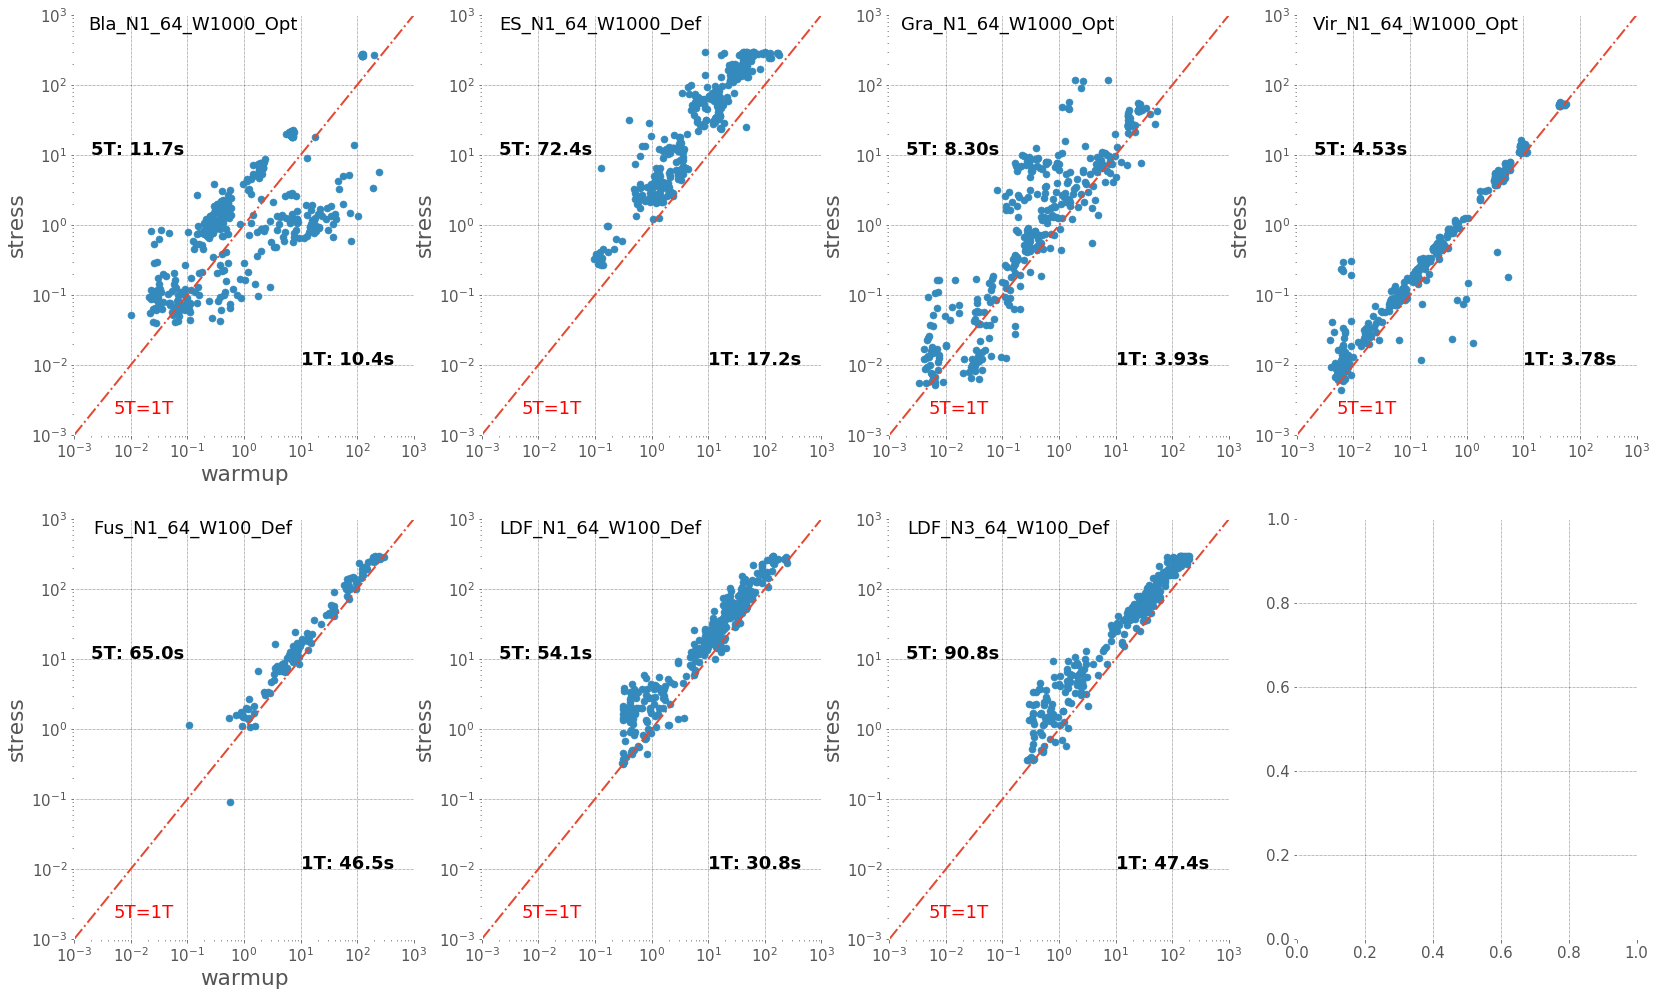

In [14]:
fig, ax = plt.subplots(2,4, figsize=(28,17), sharey=False)

for i, tup in enumerate(tuple_list):
    p = i // 4
    q = i % 4 
    
    df = pd.read_csv(generate_sorted_events_filename(tup), sep='\t', index_col=0)

    m1 = df['flag'] == 'SUCCESS'
    m2 = df['correct'] == 'CORRECT'
    
    df2 = df[m1 & m2].dropna()
    
    
    test_pivot = pd.pivot_table(df2, values='runtime', index='query_name', columns='thread_type', aggfunc='max')
    
    
    
    boundingbox = [1e-3,1e3]
    
    test_pivot.plot(kind='scatter', x='warmup', y='stress', ax=ax[p][q], \
                    xlim=boundingbox, ylim=boundingbox, loglog=True, s=50)
    
    biss = np.arange(boundingbox[0], boundingbox[1])
    
    
    test_pivot2 = test_pivot.dropna()
    
    ax[p][q].plot(biss, biss, linestyle='-.')
    ax[p][q].set_title(generateSimulationIDCompact(tup), fontsize=18, y=0.95, x=0.35 )
    
    ax[p][q].text(10,1e-2,'1T: ' + str(test_pivot2['warmup'].mean())[:4] + 's', fontweight='bold')
    ax[p][q].text(2e-3,10,'5T: '+ str(test_pivot2['stress'].mean())[:4] + 's', fontweight='bold')
    ax[p][q].text(5e-3,2e-3,'5T=1T',color='red')

    
    #ax[p][q].set_yticklabels([])    
    #ax[p][q].set_title(generateSimulationIDCompact(tup), fontsize=18, y=0.85, x=0.5 )
    #ax[p][q].set_yticks([1,2,3,4,5,6,7,8,9,10,20], minor=True)
    #ax[p][q].set_yticklabels([1,2,3,4,5,'','',8,'',10,20], minor=True)    
    
    #ax[p][q].grid('on', which='minor', axis='x' )
    #ax[p][q].grid('on', which='minor', axis='y' )


    if q !=0:
        ax[p][q].set_xlabel("")
        
        
    
        
fname= './img/caching/Watdiv_SingleMultiClient'
fig.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=400)
fig.savefig(fname+'.eps', format='eps', bbox_inches='tight', dpi=200)   
fig.savefig(fname+'.pdf', format='pdf', bbox_inches='tight', dpi=1200)        


#fname= './img/ForPaper/Watdiv_SingleMultiClient'
#plt.savefig(fname+'.svg', format='svg', bbox_inches='tight', dpi=400)
#plt.savefig(fname+'.eps', format='eps', bbox_inches='tight', dpi=200)  
#plt.savefig(fname+'.pdf', format='pdf', bbox_inches='tight', dpi=1200)        

